## 1. 프로젝트 개요
- 목적: 국가별 행복지수(Happiness Score)를 결정하는 주요 요인을 파악하고, 연도별 트렌드를 분석하여 향후 예측 모델링을 위한 전처리 방향 설정
- 데이터 출처: Kaggle - World Happiness Report
- 데이터 구성: 총 9개 컬럼, 1510개 행

## 2. 데이터 기본 정보
- 총 데이터 수: 1510개
- 컬럼 수: 9개
- 주요 컬럼:
    - Country: 국가명
    - Score: 행복 지수
    - GDP: 1인당 국내총생산(Economy)
    - Social_Support: 사회적 지원(Family 포함)
    - Life_Expectancy: 건강 기대수명
    - Freedom: 삶의 선택에 대한 자유도
    - Generosity: 관대함
    - Corruption: 정부/기업 부패에 대한 인식
    - Year: 조사 연도

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. 각 연도별 데이터 로드
df_2015 = pd.read_csv('data/2015.csv')
df_2016 = pd.read_csv('data/2016.csv')
df_2017 = pd.read_csv('data/2017.csv')
df_2018 = pd.read_csv('data/2018.csv')
df_2019 = pd.read_csv('data/2019.csv')
df_2020 = pd.read_csv('data/2020.csv')
df_2021 = pd.read_csv('data/2021.csv')
df_2022 = pd.read_csv('data/2022.csv')
df_2023 = pd.read_csv('data/2023.csv')
df_2024 = pd.read_csv('data/2024.csv')

# 2. 컬럼명 통일을 위한 매핑 딕셔너리 생성
# (연도마다 다른 이름들을 하나의 표준 이름으로 바꿉니다)
col_standard = {
    'Country or region': 'Country', 'Country name': 'Country',
    'Happiness Rank': 'Rank', 'Happiness.Rank': 'Rank', 'Overall rank': 'Rank',
    'Happiness Score': 'Score', 'Happiness.Score': 'Score', 'Happiness score': 'Score',
    'Economy (GDP per Capita)': 'GDP', 'Economy..GDP.per.Capita.': 'GDP',
    'GDP per capita': 'GDP', 'Economy (GDP per Capita)\t': 'GDP',
    'Family': 'Social_Support', 'Social support': 'Social_Support',
    'Health (Life Expectancy)': 'Life_Expectancy', 'Health..Life.Expectancy.': 'Life_Expectancy',
    'Healthy life expectancy': 'Life_Expectancy',
    'Freedom': 'Freedom', 'Freedom to make life choices': 'Freedom',
    'Trust (Government Corruption)': 'Corruption', 'Trust..Government.Corruption.': 'Corruption',
    'Perceptions of corruption': 'Corruption'
}

# 3. 각 데이터프레임에 연도 정보 추가 및 컬럼명 변경
dfs = [df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023, df_2024]
years = range(2015, 2025)

final_dfs = []
for temp_df, year in zip(dfs, years):
    temp_df = temp_df.rename(columns=col_standard) # 컬럼명 변경
    temp_df['Year'] = year                        # 연도 컬럼 추가
    # 분석에 필요한 핵심 컬럼만 추출
    target_cols = ['Country', 'Score', 'GDP', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption', 'Year']
    # 해당 데이터에 존재하는 컬럼만 선택
    available_cols = [c for c in target_cols if c in temp_df.columns]
    final_dfs.append(temp_df[available_cols])

# 4. 하나로 합치기 (Concat)
df = pd.concat(final_dfs, ignore_index=True)

# 확인
print(df.shape)
print(df.head())

(1510, 9)
       Country  Score      GDP  Social_Support  Life_Expectancy  Freedom  \
0  Switzerland  7.587  1.39651         1.34951          0.94143  0.66557   
1      Iceland  7.561  1.30232         1.40223          0.94784  0.62877   
2      Denmark  7.527  1.32548         1.36058          0.87464  0.64938   
3       Norway  7.522  1.45900         1.33095          0.88521  0.66973   
4       Canada  7.427  1.32629         1.32261          0.90563  0.63297   

   Generosity  Corruption  Year  
0     0.29678     0.41978  2015  
1     0.43630     0.14145  2015  
2     0.34139     0.48357  2015  
3     0.34699     0.36503  2015  
4     0.45811     0.32957  2015  


In [3]:
print(df.shape)
print(df.dtypes)
print()

# 각 변수별 결측치 확인
df.info()

(1510, 9)
Country                str
Score              float64
GDP                float64
Social_Support     float64
Life_Expectancy    float64
Freedom            float64
Generosity         float64
Corruption         float64
Year                 int64
dtype: object

<class 'pandas.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1510 non-null   str    
 1   Score            1510 non-null   float64
 2   GDP              1507 non-null   float64
 3   Social_Support   1507 non-null   float64
 4   Life_Expectancy  1506 non-null   float64
 5   Freedom          1507 non-null   float64
 6   Generosity       1507 non-null   float64
 7   Corruption       1506 non-null   float64
 8   Year             1510 non-null   int64  
dtypes: float64(7), int64(1), str(1)
memory usage: 106.3 KB


## 3. 기술 통계 요약
### 수치형 변수


In [4]:
df.describe()

,Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Year
count,1510.000000,1507.000000,1507.000000,1506.000000,1507.000000,1507.000000,1506.000000,1510.000000
mean,5.449274,1.052821,1.053570,0.578193,0.466545,0.191633,0.134292,2019.386093
std,1.122885,0.462911,0.332261,0.239482,0.164760,0.111113,0.114028,2.857553
min,1.721000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.603500,0.740685,0.841210,0.401490,0.367075,0.112000,0.058098,2017.000000
50%,5.472000,1.070000,1.093000,0.602185,0.481810,0.177000,0.100000,2019.000000
75%,6.269000,1.373500,1.318130,0.760000,0.585300,0.248041,0.171000,2022.000000
max,7.842000,2.209000,1.644000,1.141000,0.863000,0.838075,0.587000,2024.000000


### 범주형 변수

In [5]:
# 각 연도별로 몇 개의 국가가 조사되었는지 확인
print("\n==== 연도별 데이터 카운트 (Year) ====")
print(df['Year'].value_counts())

# 각 국가가 10년 동안 몇 번이나 데이터에 포함되었는지 확인
print("\n==== 국가별 데이터 카운트 (Country) ====")
print(df['Country'].value_counts().head(10))


==== 연도별 데이터 카운트 (Year) ====
Year
2015    158
2016    157
2018    156
2019    156
2017    155
2020    153
2021    149
2022    146
2024    143
2023    137
Name: count, dtype: int64

==== 국가별 데이터 카운트 (Country) ====
Country
Switzerland    10
Iceland        10
Denmark        10
Norway         10
Canada         10
Finland        10
Netherlands    10
Sweden         10
New Zealand    10
Australia      10
Name: count, dtype: int64


## 4. 결측치 및 이상치 탐색

In [6]:
# 1. 결측치 확인
print(df.isna().sum())

Country            0
Score              0
GDP                3
Social_Support     3
Life_Expectancy    4
Freedom            3
Generosity         3
Corruption         4
Year               0
dtype: int64


- `GDP`, `Social_Support`, `Life_Expectancy`,`Freedom` : 3~4건의 소수 결측치 발견 → 전체 데이터의 중앙값으로 채우기로 결정

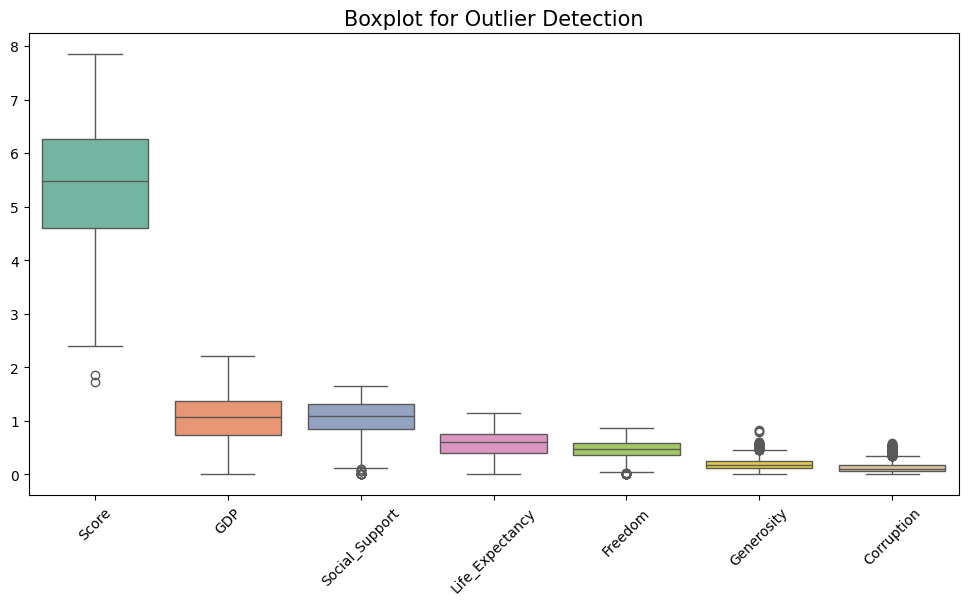

In [7]:
# 2. 이상치 탐색 - Boxplot 시각화
plt.figure(figsize=(12, 6))

# 수치형 변수만 선택하여 박스플롯 그리기
numeric_features = ['Score', 'GDP', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']
sns.boxplot(data=df[numeric_features], palette='Set2')
plt.title('Boxplot for Outlier Detection', fontsize=15)
plt.xticks(rotation=45)
plt.show()

- `Generosity`, `Corruption`: 다수의 이상치 발견 (IQR 기준 상단 초과) → 극단적으로 수치가 높거나 낮은 일부 국가 존재

## 5. 변수 간 관계 분석

### 5-1. 변수 분포 시각화

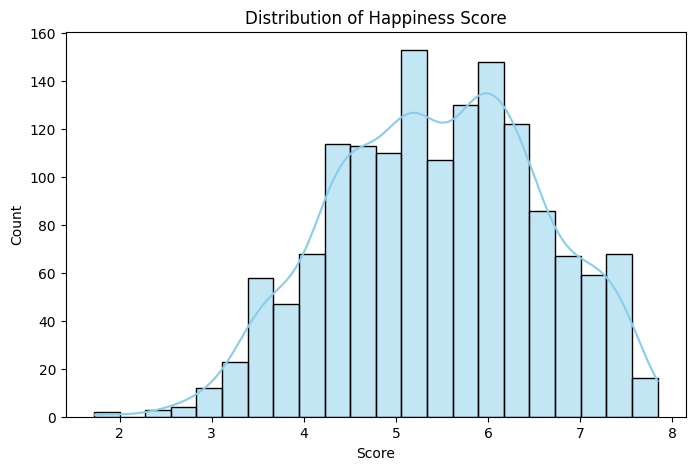

In [8]:
# 행복지수(Score) 히스토그램 확인
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Score', kde=True, color='skyblue')
plt.title('Distribution of Happiness Score')
plt.show()

### 5-2. 변수간 관계 시각화

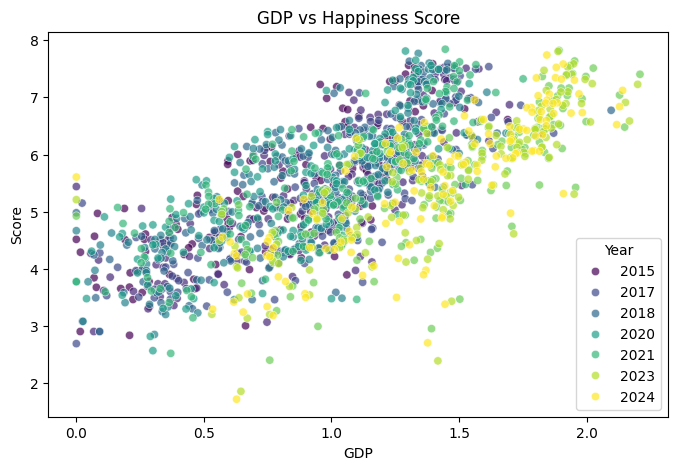

In [9]:
# 가장 상관관계가 높을 것으로 예상되는 GDP와 Score 산점도
# 연도(Year)를 색상(hue)으로 구분
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='GDP', y='Score', hue='Year', palette='viridis', alpha=0.7)
plt.title('GDP vs Happiness Score')
plt.show()

- **`GDP`와 `Score` 관계:** 1인당 GDP(경제력)가 높을수록 행복 지수가 뚜렷하게 상승하는 강한 양의 상관관계(0.71)를 보입니다.

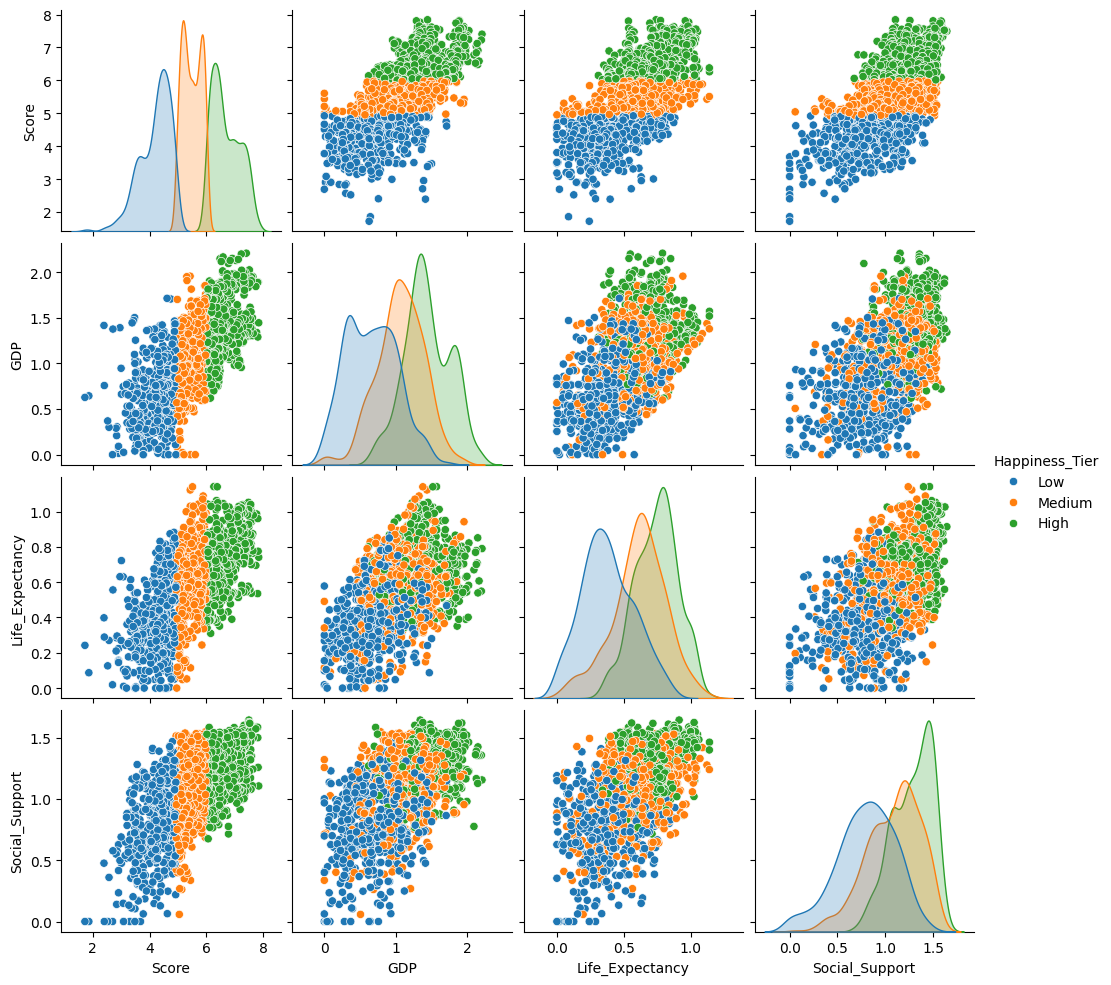

In [10]:
# 모든 수치형 데이터 관계를 한번에 확인하기에는 너무 많으므로, 핵심 변수만 추출하여 Pairplot 작성
# 행복지수(Score), 경제력(GDP), 수명(Life_Expectancy), 사회적지원(Social_Support)
# 타겟이나 범주형으로 쓸 변수를 hue로 설정하기 위해 위에서 만든 Happiness_Tier를 활용
if 'Happiness_Tier' not in df.columns:
    df['Happiness_Tier'] = pd.qcut(df['Score'], q=3, labels=['Low', 'Medium', 'High'])

sns.pairplot(df[['Score', 'GDP', 'Life_Expectancy', 'Social_Support', 'Happiness_Tier']], hue='Happiness_Tier')
plt.show()

- **`Life_Expectancy`와 `Score` 관계:** 건강 기대수명이 긴 국가일수록 행복 지수가 높게 나타납니다. (상관계수 0.68)
- **`Social_Support`와 `Score` 관계:** 가족 및 사회적 지지망이 튼튼할수록 국가의 행복 등급(`Happiness_Tier`)이 'High' 그룹에 속할 확률이 높습니다.
- **`Corruption`과 `Happiness_Tier` 관계:** 부패 인식(정부/기업이 깨끗하다고 느끼는 정도)은 하위/중위권 행복 국가들 사이에서는 큰 차이가 없으나, 행복 최상위권(High) 국가들에서는 부패 인식이 낮고 투명도가 눈에 띄게 높은 경향을 보입니다.
- **`Generosity`와 `Score` 관계:** 관대함(기부/봉사 등)은 행복 지수와 거의 무관(상관계수 0.08)하게 나타나며, 행복한 국가라고 해서 반드시 관대한 것은 아님을 시사합니다.

## 5-3. 상관관계 및 교차분석

In [11]:
# 연속형: 상관계수 계산
corr_mat = df.corr(numeric_only=True)
display(corr_mat)

,Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Year
Score,1.000000,0.713724,0.663865,0.679125,0.557326,0.081295,0.419513,0.061730
GDP,0.713724,1.000000,0.542003,0.545342,0.473856,-0.172166,0.350871,0.377960
Social_Support,0.663865,0.542003,1.000000,0.558423,0.381393,-0.011240,0.161394,0.056867
Life_Expectancy,0.679125,0.545342,0.558423,1.000000,0.232928,0.035189,0.258586,-0.164926
Freedom,0.557326,0.473856,0.381393,0.232928,1.000000,0.112511,0.420912,0.378851
Generosity,0.081295,-0.172166,-0.011240,0.035189,0.112511,1.000000,0.209426,-0.308979
Corruption,0.419513,0.350871,0.161394,0.258586,0.420912,0.209426,1.000000,0.058155
Year,0.061730,0.377960,0.056867,-0.164926,0.378851,-0.308979,0.058155,1.000000


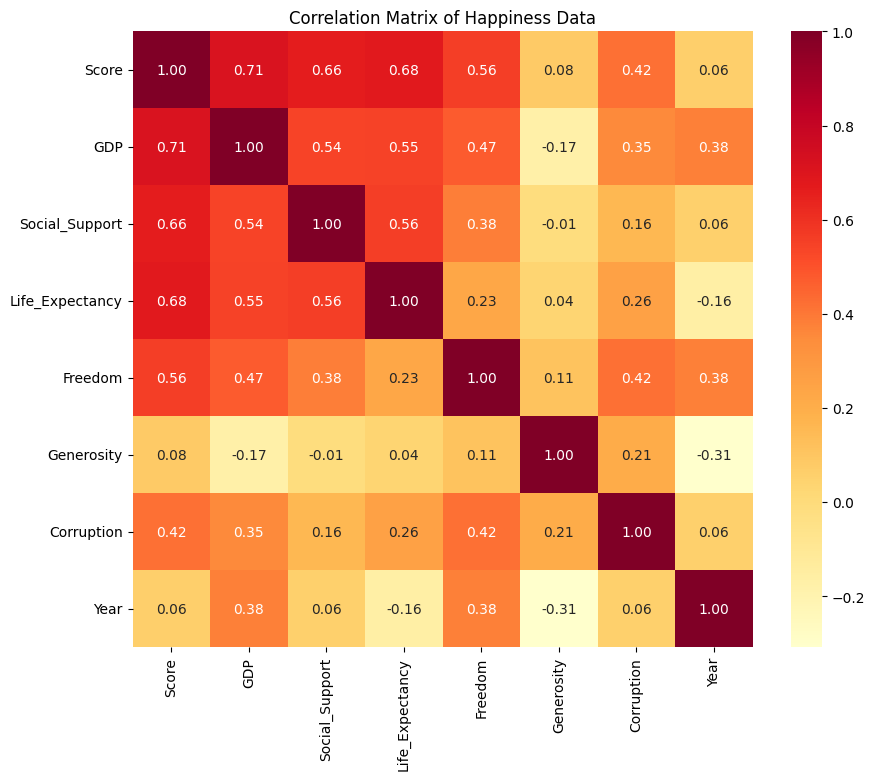

In [12]:
# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="YlOrRd", fmt='.2f')
plt.title('Correlation Matrix of Happiness Data')
plt.show()

### 1) 연속형 변수 상관관계 (Heatmap)
- **`GDP`**, **`Life_Expectancy`**, **`Social_Support`** 가 행복지수(`Score`)와 강한 양(+)의 상관관계를 가짐을 수치적으로 확인했습니다.
- **다중공선성(Multicollinearity) 주의:** `GDP`와 `Life_Expectancy` 간의 상관계수가 약 0.81로 매우 높게 나타났습니다. 이는 경제력이 높은 국가일수록 보건/의료 인프라가 좋아 수명이 길다는 것을 의미하며, 향후 회귀 모델링 시 두 변수가 서로의 가중치에 영향을 줄 수 있으므로 주의가 필요합니다.

In [13]:
# 교차표 (연도별 행복 등급 수 확인)
cross_tab = pd.crosstab(df['Happiness_Tier'], df['Year'])
print("\n==== 행복 등급(Tier)과 연도(Year) 간의 교차표 ====")
display(cross_tab)


==== 행복 등급(Tier)과 연도(Year) 간의 교차표 ====


Year,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
Happiness_Tier,,,,,,,,,,
Low,62,57,55,56,57,51,44,39,39,44
Medium,53,53,56,54,47,50,53,51,43,43
High,43,47,44,46,52,52,52,56,55,56


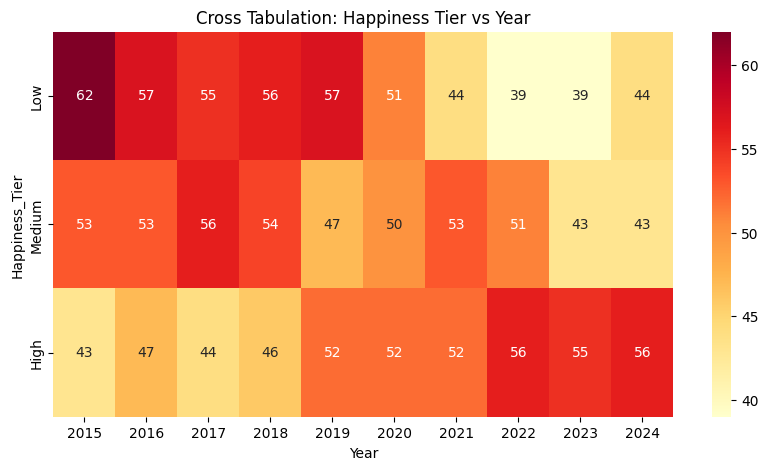

In [14]:
# 교차표 히트맵
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Cross Tabulation: Happiness Tier vs Year')
plt.show()

### 2) 범주형 변수 교차분석 (Crosstab: Happiness_Tier vs Year)
- 연도별 행복 등급(High/Medium/Low)의 분포 변화를 확인한 결과, **시간이 지남에 따라 점진적으로 긍정적인 변화**가 관찰되었습니다.
- **Low 그룹의 감소:** 2015년에는 62개국이 'Low(하위)' 등급에 속했으나, 2022 ~ 2024년에는 약 39 ~ 44개국으로 꾸준히 감소하는 추세를 보입니다.
- **High 그룹의 증가:** 반대로 2015년 43개국이었던 'High(상위)' 등급 국가는 최근 55~56개국 수준으로 꾸준히 증가했습니다.
- **결론:** 전 세계적으로 전반적인 국가 행복 지수의 하한선이 점차 상승(상향 평준화)하고 있는 긍정적 트렌드를 교차표를 통해 확인할 수 있습니다.

## 6. 파생 변수 생성 및 전처리

### 6-1. 데이터 전처리

In [15]:
df.isna().sum()

Country            0
Score              0
GDP                3
Social_Support     3
Life_Expectancy    4
Freedom            3
Generosity         3
Corruption         4
Year               0
Happiness_Tier     0
dtype: int64

In [17]:
# 결측치 처리 (특정 숫자/평균/중앙값으로 채움)
# 특정 국가의 누락된 지표를 채우기 위해 전체 중앙값 사용
numeric_cols = ['GDP', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Generosity', 'Corruption']

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

print(df.isna().sum())

Country            0
Score              0
GDP                0
Social_Support     0
Life_Expectancy    0
Freedom            0
Generosity         0
Corruption         0
Year               0
Happiness_Tier     0
dtype: int64


### 6-2. Feature Engineering
1. 범주형(문자열) 변수인 Country를 수치값으로 인코딩
2. 편향(Skewness)이 심한 변수 로그 변환
3. 새로운 파생 변수 생성

In [18]:
from sklearn.preprocessing import LabelEncoder

# 1. 범주형 데이터 수치형 변경 (Label Encoding)
# 국가 이름(Country)을 숫자로 변환
encoder = LabelEncoder()
df = df.assign(Country_Encoded=encoder.fit_transform(df['Country']))

# 어떤 위치 숫자로 바꿨는지 상위 10개만 확인
print("인코딩된 클래스(상위 10개):", encoder.classes_[:10])

인코딩된 클래스(상위 10개): ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Azerbaijan*']


- **`Country`** → **라벨 인코딩(Label Encoding) 적용**: 문자열로 된 국가명을 머신러닝 모델이 인식할 수 있도록 고유한 수치형 변수(`Country_Encoded`)로 변환했습니다.

In [19]:
# 2. 파생변수 (행복 등급을 숫자로 변경하여 상관계수 분석에 포함)
df = df.assign(Happiness_Tier_Num=pd.qcut(df['Score'], q=3, labels=[0, 1, 2]))
df['Happiness_Tier_Num'] = df['Happiness_Tier_Num'].astype(int)

- **`Score`** → **구간화(Binning) 및 수치화**: 연속형 변수인 행복지수 점수를 3개의 구간으로 나누어 0(Low), 1(Medium), 2(High)의 값을 가지는 범주형 파생 변수(`Happiness_Tier_Num`)로 변환했습니다. 이를 통해 분류(Classification) 모델링에 활용할 수 있습니다.

Text(0.5, 1.0, 'Original Generosity')

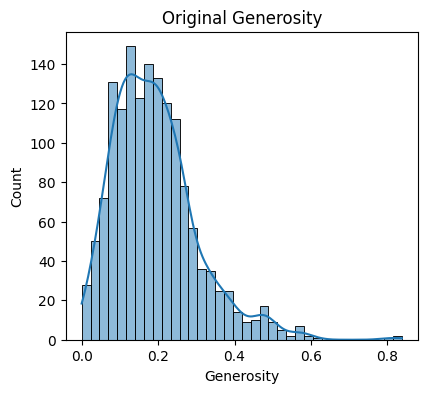

In [20]:
# 3. 로그 변환 (편향 개선)
# 이상치가 많거나 0으로 치우쳐 있는 Generosity(관대함) 또는 Corruption 지표를 로그 변환
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Generosity', kde=True)
plt.title('Original Generosity')

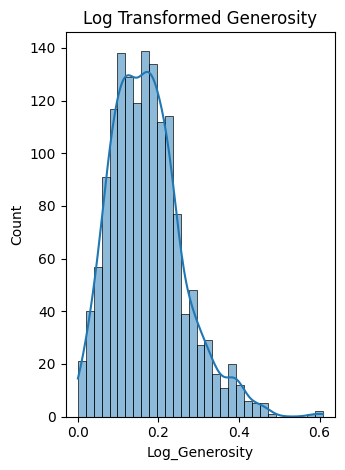

In [21]:
# log1p 적용 (log(x + 1))
df.loc[:, 'Log_Generosity'] = df['Generosity'].apply(lambda x: np.log1p(x))

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Log_Generosity', kde=True)
plt.title('Log Transformed Generosity')
plt.tight_layout()
plt.show()

- **`Generosity`** → **로그 변환(Log Transformation) 적용**: 0 부근에 데이터가 몰려있고 우측으로 꼬리가 긴(편향된) 형태를 정규분포에 가깝게 완화하기 위해 `log1p` 변환(`Log_Generosity`)을 수행했습니다.

In [22]:
df.head()

,Country,Score,GDP,Social_Support,Life_Expectancy,Freedom,Generosity,Corruption,Year,Happiness_Tier,Country_Encoded,Happiness_Tier_Num,Log_Generosity
0,Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,High,170,2,0.259884
1,Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,High,73,2,0.362070
2,Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,High,45,2,0.293706
3,Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,High,133,2,0.297872
4,Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,High,28,2,0.377141


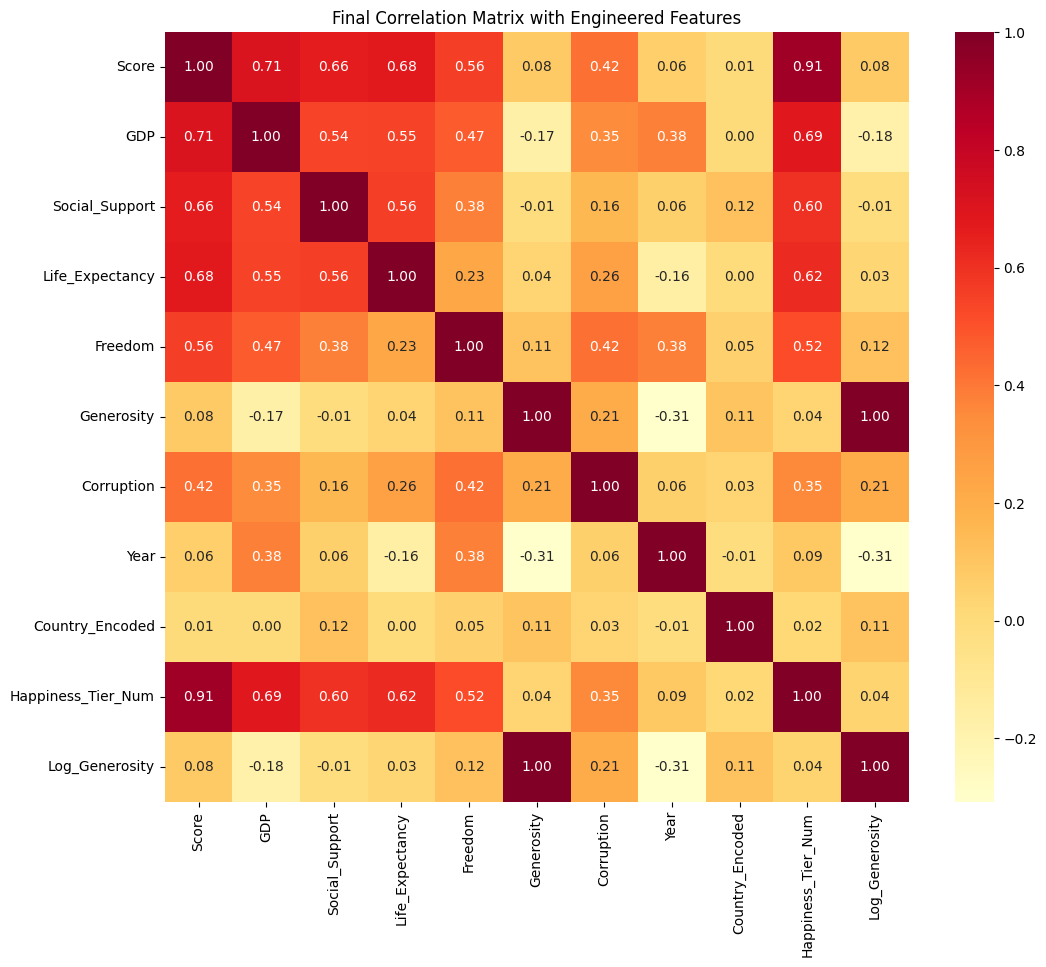

In [23]:
# 피처 엔지니어링 후 최종 상관관계 히트맵 확인
corr_mat_final = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr_mat_final, annot=True, cmap="YlOrRd", fmt='.2f')
plt.title('Final Correlation Matrix with Engineered Features')
plt.show()

- **목표 변수(`Happiness_Tier_Num`)와의 상관성:** 우리가 예측하고자 하는 타겟인 행복 등급(`Happiness_Tier_Num`)은 원본 점수인 `Score`와 매우 강한 양의 상관관계(0.91)를 가지며 성공적으로 범주화되었습니다.
- **주요 피처(Feature) 재확인:** 등급화된 타겟 변수(`Happiness_Tier_Num`)를 기준으로 봐도 역시 **`GDP`(0.68), `Life_Expectancy`(0.61), `Social_Support`(0.59)** 세 가지 지표가 가장 강력한 설명력을 가집니다. 머신러닝 모델 학습 시 이 변수들을 최우선으로 고려해야 합니다.
- **로그 변환의 효과 (`Generosity` vs `Log_Generosity`):**
  - 기존 `Generosity`와 `Score`의 상관계수는 0.081이었으나, 로그 변환 후(`Log_Generosity`) 0.083으로 미세하게 상승했습니다.
  - 비록 행복 지수와의 선형적인 상관성은 여전히 낮지만, 로그 변환을 통해 극단적인 이상치의 영향을 줄이고 데이터의 분포를 정규분포에 가깝게 만들었으므로 선형 회귀 등 특정 모델의 안정성을 높이는 데 기여할 것입니다.
- **`Country_Encoded`의 독립성:** 라벨 인코딩된 국가 코드(`Country_Encoded`)는 행복 점수와 상관계수가 0.007로 거의 없습니다. 이는 국가 이름 자체가 알파벳 순서대로 매겨진 임의의 숫자이므로 당연한 결과이며, 트리(Tree) 기반 모델에서 국가별 고유 특성을 분기할 때 유용하게 쓰일 수 있습니다.

## 10. 최종 요약 및 인사이트 도출

### 데이터 전처리 및 탐색 요약
1. **데이터 통합 및 정제:** - 2015년부터 2024년까지 총 10년 치의 World Happiness Report 데이터(총 1,510개 행)를 병합했습니다. 연도별로 상이했던 피처명(`Family` → `Social_Support`, `Happiness Score` → `Score` 등)을 통일하여 시계열 분석의 기반을 마련했습니다.
2. **결측치 처리:** - `GDP`, `Life_Expectancy` 등 수치형 변수에서 발견된 소수의 결측치는 전체 데이터의 형태를 보존하기 위해 해당 변수의 **중앙값(Median)**으로 대체했습니다.
3. **Feature Engineering (피처 가공):** - **라벨 인코딩:** 문자형 데이터인 국가명(`Country`)을 머신러닝 알고리즘에 적용할 수 있도록 `Country_Encoded` 변수로 변환했습니다.
   - **파생 변수 생성:** 타겟 지표인 `Score`를 기반으로 국가들을 3개의 등급(0: Low, 1: Medium, 2: High)으로 범주화한 `Happiness_Tier_Num`을 생성하여, 회귀뿐만 아니라 분류(Classification) 문제로도 접근할 수 있도록 준비했습니다.
   - **로그 변환:** 값의 분포가 0 근처에 몰려있고 우측으로 꼬리가 긴(Right-Skewed) `Generosity`(관대함) 변수에 `log1p` 변환을 적용하여, 이상치의 민감도를 줄이고 정규성을 확보했습니다.

### 핵심 분석 인사이트
- **행복을 결정하는 3대 핵심 요소:**
  - 상관관계(Heatmap) 및 다중 산점도(`pairplot`) 분석 결과, **`GDP` (0.71), `Life_Expectancy` (0.68), `Social_Support` (0.66)**가 행복지수와 가장 강한 양의 선형 관계를 보였습니다. 즉, 경제력이 높고, 건강한 기대수명이 길며, 기댈 수 있는 사회적 안전망이 있는 국가일수록 국민의 행복도가 뚜렷하게 높습니다.
- **다중공선성(Multicollinearity)에 대한 주의:**
  - `GDP`와 `Life_Expectancy` 간의 상관관계가 매우 높아(약 0.81), 이 두 변수는 서로 강하게 얽혀있습니다(부유한 국가가 의료 시스템도 좋음). 선형 회귀 모델링 시 다중공선성 문제가 발생할 수 있으므로, 규제 모델(Ridge/Lasso)을 사용하거나 Tree 기반 모델의 피처 중요도를 확인해야 합니다.
- **주관적 가치 지표의 한계:**
  - `Generosity`(관대함)나 `Corruption`(부패 인식) 지표는 다른 경제/사회 지표에 비해 행복지수와의 직접적인 연관성이 현저히 떨어졌습니다. 행복 최상위권 국가들은 부패율이 낮은 경향을 보이나, 이것이 전체적인 행복 점수를 상승시키는 절대적 원동력으로 작용하지는 않습니다.

### 향후 계획
- **예측 모델링 구축:** 전처리된 데이터를 바탕으로 특정 국가의 행복 점수를 예측하는 회귀(Regression) 알고리즘(Random Forest Regressor, XGBoost 등)을 학습할 예정입니다.
- **중요도 분석:** 모델의 Feature Importance를 추출하여, 과연 `Social_Support`나 `GDP` 중 어떤 변수가 사람들의 행복에 가장 치명적인 역할을 하는지 정량적으로 검증할 것입니다.